In [19]:
from mp_api.client import MPRester
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter, PourbaixEntry
from api_key import APIKEY

API_KEY = APIKEY

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        energy_above_hull=(0, 0.008), band_gap=[0.85,2.15], is_stable=True, fields=["material_id"]
    )
    materials = [doc.material_id for doc in docs]

Retrieving SummaryDoc documents:   0%|          | 0/5081 [00:00<?, ?it/s]

In [ ]:
new_mat = materials[:1000]
bandstruct = []
failed_ids = []

with MPRester(API_KEY) as mpr:
    for mp_id in new_mat:
        try:
            band_structure = mpr.get_bandstructure_by_material_id(mp_id)
            bandstruct.append(band_structure)
        except Exception as e:
            print(f"Failed to retrieve band structure for {mp_id}: {e}")
            failed_ids.append(mp_id)

# Remove the failed IDs from the materials list
for id in failed_ids:
    new_mat.remove(id)



In [43]:
print(len(bandstruct))
print(len(new_mat))

656
656


In [44]:
cbm_data = []
cbm_energy = []

vbm_data = []
vbm_energy = []

for band_structure in bandstruct:
    try:
        cbm = band_structure.get_cbm()
        cbm_data.append(cbm)

        vbm = band_structure.get_vbm()
        vbm_data.append(vbm)
    except Exception as e:
        print(f"band_structure fail: {e}")

for cbm in cbm_data:
    try:
        cbmeng = cbm['energy']
        cbm_energy.append(cbmeng)
    except Exception as e:
        print(f"CBM fail: {e}")

for vbm in vbm_data:
    try:
        vbmeng = vbm['energy']
        vbm_energy.append(vbmeng)
    except Exception as e:
        print(f"VBM fail: {e}")

    


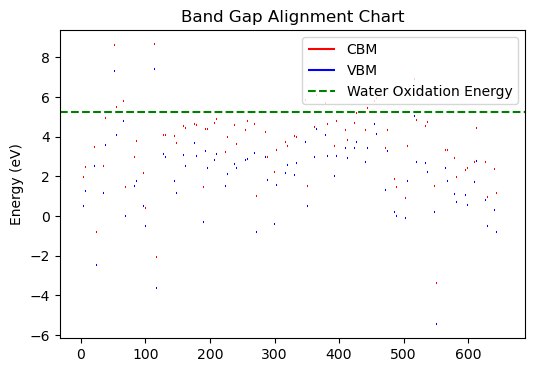

In [45]:
import matplotlib.pyplot as plt

# CBM and VBM energies

# Material names or identifiers


# Water oxidation energy level (adjust as needed for your reference level)
water_oxidation_energy = 5.26

# Create the plot
plt.figure(figsize=(6, 4))

# Plotting CBM and VBM for each material
for i in range(len(new_mat)):
    plt.hlines(cbm_energy[i], i - 0.1, i + 0.1, colors='red', label='CBM' if i == 0 else "")
    plt.hlines(vbm_energy[i], i - 0.1, i + 0.1, colors='blue', label='VBM' if i == 0 else "")

# Adding water oxidation energy line
plt.axhline(y=water_oxidation_energy, color='green', linestyle='--', label='Water Oxidation Energy')

# Adding labels and title
plt.ylabel('Energy (eV)')
plt.title('Band Gap Alignment Chart')
plt.legend()

# Show the plot
plt.show()

